<h2 style="text-align:center;font-size:200%;">
    <b>Model Explainability in Industrial Image Detection</b>
</h2>
<h3  style="text-align:center;">Keywords : 
    <span style="border-radius:7px;background-color:limegreen;color:white;padding:7px;">Image Classification</span>
    <span style="border-radius:7px;background-color:limegreen;color:white;padding:7px;">Data Augmentation</span>
    <span style="border-radius:7px;background-color:limegreen;color:white;padding:7px;">CNN</span>
    <span style="border-radius:7px;background-color:limegreen;color:white;padding:7px;">Model Explanation</span>
    <span style="border-radius:7px;background-color:limegreen;color:white;padding:7px;">Error Analysis</span>
</h3>

<hr>

<a id='top'></a>
<h2 style="font-size:150%;"><span id='top'>Table of Contents</span></h2>
<blockquote>
    <ol>
        <li><a href="#Overview">Overview</a></li>
        <ul>
            <li><a href="#Project-Detail">Project Detail</a></li>
            <li><a href="#About-Dataset">About Dataset</a></li>
        </ul>
        <li><a href="#Import-libraries">Import libraries</a></li>
        <li><a href="#Load-the-dataset">Load the dataset</a></li>
        <li><a href="#Pre-Processing">Pre-Processing</a></li>
        <ul>
            <li><a href="#What-is-Data-Augmentation?">What is Data Augmentation?</a></li>
            <li><a href="#Execute-Data-Augmentation">Execute Data Augmentation</a></li>
        </ul>
        <li><a href="#Modeling">Modeling</a></li>
        <ul>
            <li><a href="#Model-Settings">Model Settings</a></li>
            <li><a href="#Build-Model">Build Model</a></li> 
            <li><a href="#Model-Performance">Model Performance</a></li>
            <li><a href="#Predict-on-Some-Images">Predict on Some Images</a></li> 
            <li><a href="#Misclassified-Images">Misclassified Images</a></li> 
            <li><a href="#Explain-Model">Explain Model</a></li> 
            <li><a href="#Explain-Why-Misclassified">Explain Why Misclassified</a></li> 
        </ul>
        <li><a href="#Conclusion">Conclusion</a></li>
        <li><a href="#References">References</a></li>
    </ol>
</blockquote>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Overview</div>
## Project Detail  
In the manufacturing industry, reducing processing errors in the manufacturing process is important for maximizing profits. In order to reduce processing errors, it is necessary to secure a budget for quality assurance, implement manual inspection work, and review the manufacturing process. Particularly, the inspection process is carried out by many companies, but there are <u>problems such as uneven accuracy denpending on inspection workers and increased labor costs</u>.<br>
In this notebook, we will verify whether the bottleneck of <b>"manual inspection"</b> can be cleared by <u>automating the inspection process by machine learning</u> in the manufacturing process of [casting products](https://en.wikipedia.org/wiki/Casting_%28metalworking%29). [Casting](https://en.wikipedia.org/wiki/Casting) is a technique in which molten metal is poured into a mold and processed into a desired shape.  
According to [this article](https://en.wikipedia.org/wiki/Casting_defect), the following are some of the defects in the casting process.
* blow holes
* pinholes
* burr
* shrinkage defects
* mould material defects
* pouring metal defects
* metallurgical defects

## About Dataset
[This dataset](https://www.kaggle.com/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product) provides image data of impellers for submersible pumps.<br/><br/>
<table border="0">
     <tr style="background-color: white !important;">
        <td>
            <img src="https://static.turbosquid.com/Preview/2020/06/07__08_34_27/11R131.JPGB3B4468C-B515-4E11-92F7-4CA67966DB2BZoom.jpg" width="300">
            <figcaption style="text-align:center">Submersible Pump</figcaption>
        </td>
        <td>
            <img src="https://5.imimg.com/data5/WI/KC/MY-6121640/submersible-pump-impeller-500x500.jpg" width="300">
            <figcaption style="text-align:center">Impeller</figcaption>
        </td>
    </tr>
 </table><br/>
The image data is labeled with <b>ok(normal)</b> and <b>def(defect/anomaly)</b> in advance. In addition, since it is necessary to illuminate the image in a stable condition when acquiring the image, the data was acquired based on a special lighting setting.

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Import libraries</div>

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
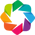

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
import json

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend
from sklearn.metrics import confusion_matrix, classification_report

import shap
from operator import itemgetter

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Load the dataset</div>

In [2]:
data_dir = "/kaggle/input"

In [3]:
my_data_dir = f'{data_dir}/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/'
train_path = my_data_dir + 'train/'
test_path = my_data_dir + 'test/'

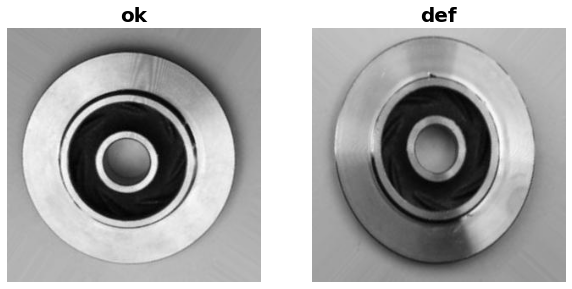

In [4]:
plt.figure(figsize=(10,8))
ok = plt.imread(train_path + 'ok_front/cast_ok_0_1.jpeg')
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title("ok", weight='bold', size=20)
plt.imshow(ok,cmap='gray')

ng = plt.imread(train_path + 'def_front/cast_def_0_1001.jpeg')
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title("def", weight='bold', size=20)
plt.imshow(ng,cmap='gray')

plt.show()

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Pre-Processing</div>
In training models for image classification, <b>[Data Augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation)</b> techniques are needed to build more robust models.

## What is Data Augmentation?
<div class="alert alert-success" role="alert" style="border-radius:10px">
    <p>When training with image data without data augmentation, we simply need the specified number of data and create a mini-batch. When executing data augmentation, after acquiring the data, various augmentation techniques are applied to the image to create a new mini-batch. <br/>
    The main parameters of data augmentation techniques(Keras <a href='https://keras.io/ja/preprocessing/image/'>ImageDataGenerator</a>) are as follows : </p>
    <ul>
        <li><b>rotation_range</b> : Rotate the image (ex. 50 -> rotate randomly in -50°~50°)</li>
        <li><b>zoom_range</b> : Zoom in/out on the image (ex. 0.5 -> zoom in/out randomly in 1-0.5~1+0.5)</li>
        <li><b>brightness_range</b> : Change the brightness (ex. [0.3,1.0] -> change randomly in [0.3,1.0])</li>
        <li><b>vertical_flip</b> : Flip the image upside down</li>
        <li><b>horizontal_flip</b> : Flip the image left or right</li>
        <li><b>height_shift_range</b> : Move the image up or down in parallel (ex. 0.3 -> move up/down randomly in [-0.3*Height, 0.3*Height])</li>
        <li><b>width_shift_range</b> : Move the image left or right in parallel (ex. 0.3 -> move left/right randomly in [-0.3*Width, 0.3*Width])</li>
        <li><b>rescale</b> : The image is normalized by multiplying each pixel value by a constant. (ex. 1/255 -> normalize the RGB value of each pixel between 0.0 and 1.0)</li>
    </ul>
</div>

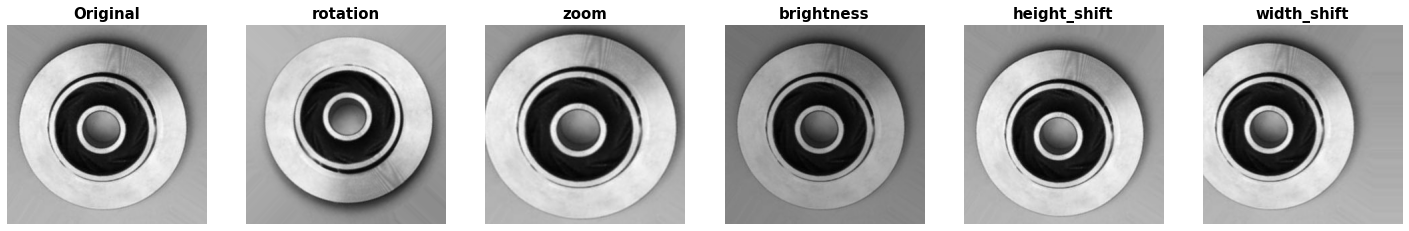

In [5]:
img = cv2.imread(train_path + 'ok_front/cast_ok_0_1.jpeg')
img_4d = img[np.newaxis]
plt.figure(figsize=(25,10))
generators = {"rotation":ImageDataGenerator(rotation_range=180), 
              "zoom":ImageDataGenerator(zoom_range=0.7), 
              "brightness":ImageDataGenerator(brightness_range=[0.2,1.0]), 
              "height_shift":ImageDataGenerator(height_shift_range=0.7), 
              "width_shift":ImageDataGenerator(width_shift_range=0.7)}

plt.subplot(1, 6, 1)
plt.title("Original", weight='bold', size=15)
plt.imshow(img)
plt.axis('off')
cnt = 2
for param, generator in generators.items():
    image_gen = generator
    gen = image_gen.flow(img_4d, batch_size=1)
    batches = next(gen)
    g_img = batches[0].astype(np.uint8)
    plt.subplot(1, 6, cnt)
    plt.title(param, weight='bold', size=15)
    plt.imshow(g_img)
    plt.axis('off')
    cnt += 1
plt.show()

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

## Execute Data Augmentation
<div class="alert alert-success" role="alert" style="border-radius:10px">
    <p>In Keras, you can pass <a href='https://keras.io/ja/preprocessing/image/'>ImageDataGenerator</a> class as a dataset when training a model, and it creates a mini-batch by randomly applying the parameters. Empirically, if the parameter is set to an extreme high/low value, <u>the image will be strongly converted and the training will be difficult to proceed.</u> In addition, it seems that fine adjustment of parameters is required for each target data or analysis objectives in order to proceed with training successfully.<br/>
    In this notebook, we will execute data augmentation with a slight conversion by referring to other notebooks.</p>
</div>

In [6]:
image_gen = ImageDataGenerator(rescale=1/255, 
                               zoom_range=0.1, 
                               brightness_range=[0.9,1.0])

In [7]:
image_shape = (300,300,1) # 300 × 300、graysclaed (full-color : 3)
batch_size = 32

train_set = image_gen.flow_from_directory(train_path,
                                            target_size=image_shape[:2],
                                            color_mode="grayscale",
                                            classes={'def_front': 0, 'ok_front': 1},
                                            batch_size=batch_size,
                                            class_mode='binary',
                                            shuffle=True,
                                            seed=0)

test_set = image_gen.flow_from_directory(test_path,
                                           target_size=image_shape[:2],
                                           color_mode="grayscale",
                                           classes={'def_front': 0, 'ok_front': 1},
                                           batch_size=batch_size,
                                           class_mode='binary',
                                           shuffle=False,
                                           seed=0)

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [8]:
train_set.class_indices

{'def_front': 0, 'ok_front': 1}

* class 0 : defect 
* class 1 : ok

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Modeling</div>
Since the purpose of this notebook is to learn the basics of image analysis technology, we will train the model using a simple CNN, and not pursue the accuracy of the model.

## Model Settings
<div class="alert alert-success" role="alert" style="border-radius:10px">
    <p>The elements of the model are listed below.（<a href="https://www.kaggle.com/ginsaputra/visual-inspection-of-casting-products-using-cnn">Referenced Notebook</a>）</p>
    <ul>
        <li><b>Sequential</b> : model container（<a href="https://keras.io/ja/getting-started/sequential-model-guide/">Official Manual</a>）</li>
        <li><b>Conv2D</b> : convolutional layer for 2D images（<a href="https://keras.io/ja/layers/convolutional/#conv2d">Official Manual</a>）
            <ul>
                <li><b>filters</b> : number of filters
                    <ul>
                        <li>numbers such as <u>16, 32, 64, 128, 256 and 512</u> tend to be used, and there is a technique to increase the number of filter for the complicated task and decrease it for simple one.</li>
                    </ul>
                </li>
                <li><b>kernel_size</b> : filter size (width * height)
                    <ul>
                        <li>combinations of odd numbers such as <u>3x3, 5x5, 7x7</u> tend to be used.</li>
                    </ul>
                </li>
                <li><b>strides</b> : window size used for convolution</li>
                <li><b>input_shape</b> : size of input images (width/height, color channel)
                    <ul>
                        <li>if you input color images as it is, the model will need convolutions for 3 RGB channels, which will increase the amount of calculation(graysclaed images need less calculations).</li>
                    </ul>
                </li>
                <li><b>activation</b> : activation function</li>
                <li><b>padding</b> : adjust the size of the layer output. When set to 'same', the pixels are filled with 0 so that the input and output sizes are the same.</li>
            </ul>
        </li>
        <li><b>MaxPooling2D</b> : pooling layer for 2D images（<a href="https://keras.io/ja/layers/pooling/#maxpooling2d">Official Manual</a>）
            <ul>
                <li><b>pool_size</b> : specify width/height range and extract the largest pixel in this range to downscale the input</li>
                <li><b>strides</b> : window size used for pooling</li>
            </ul>
        </li>
        <li><b>Flatten</b> : convert input to linear vector（<a href="https://keras.io/ja/layers/core/#flatten">Official Manual</a>）</li>
        <li><b>Dropout</b> : apply dropout and randomly set the input to the unit to 0 to prevent overfitting when updating weights（<a href="https://keras.io/ja/layers/core/#dropout">Official Manual</a>）
            <ul>
                <li><b>rate</b> : ratio of dropping the input to the unit</li>
            </ul>
        </li>
        <li><b>Dense</b> : fully connected layer（<a href="https://keras.io/ja/layers/core/#dense">Official Manual</a>）
            <ul>
                <li><b>units</b> : number of dimensions of output</li>
                <li><b>activation</b> : activation function（binary classification : <u>sigmoid</u>, other objectives : <u>softmax</u>） </li>
            </ul>
        </li>
    </ul>
</div>

In [9]:
backend.clear_session()
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(7,7), strides=2, input_shape=image_shape, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, input_shape=image_shape, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, input_shape=image_shape, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(units=224, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      800       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

The figure below shows the model architecture.

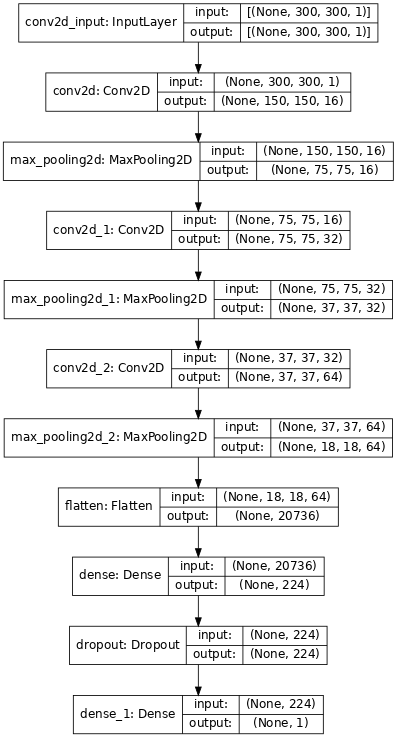

In [10]:
plot_model(model, show_shapes=True, expand_nested=True, dpi=60)

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

## Build Model
<div class="alert alert-success" role="alert" style="border-radius:10px">
    Build settings:  
    <ul>
        <li><b>EarlyStopping</b> : Conditions to stop training early (<a href='https://keras.io/ja/callbacks/#earlystopping'>Official Manual</a>)</li>
            <ul>
                <li>ex. validation loss not improved continuously in 2 epochs</li>
            </ul>
        <li><b>ModelCheckpoint</b> : Model saving settings for each epoch (<a href='https://keras.io/ja/callbacks/#modelcheckpoint'>Official Manual</a>)</li>
    </ul>
</div>

In [11]:
model_save_path = 'casting_product_detection.hdf5'
early_stop = EarlyStopping(monitor='val_loss',patience=2)
checkpoint = ModelCheckpoint(filepath=model_save_path, verbose=1, save_best_only=True, monitor='val_loss')

In [12]:
n_epochs = 20
results = model.fit_generator(train_set, epochs=n_epochs, validation_data=test_set, callbacks=[early_stop,checkpoint])

Epoch 1/20
208/208 [==============================] - 102s 474ms/step - loss: 0.6403 - accuracy: 0.6306 - val_loss: 0.3069 - val_accuracy: 0.8909

Epoch 00001: val_loss improved from inf to 0.30693, saving model to casting_product_detection.hdf5
Epoch 2/20
208/208 [==============================] - 58s 279ms/step - loss: 0.2848 - accuracy: 0.8774 - val_loss: 0.1358 - val_accuracy: 0.9469

Epoch 00002: val_loss improved from 0.30693 to 0.13580, saving model to casting_product_detection.hdf5
Epoch 3/20
208/208 [==============================] - 59s 282ms/step - loss: 0.1539 - accuracy: 0.9449 - val_loss: 0.1008 - val_accuracy: 0.9636

Epoch 00003: val_loss improved from 0.13580 to 0.10080, saving model to casting_product_detection.hdf5
Epoch 4/20
208/208 [==============================] - 58s 280ms/step - loss: 0.1166 - accuracy: 0.9525 - val_loss: 0.0643 - val_accuracy: 0.9804

Epoch 00004: val_loss improved from 0.10080 to 0.06433, saving model to casting_product_detection.hdf5
Epoch 5

In [13]:
model_history = { i:list(map(lambda x: float(x), j)) for i,j in results.history.items() }
with open('model_history.json', 'w') as f:
    json.dump(model_history, f, indent=4)

Reusing a trained model and training history

In [14]:
#model = load_model("/kaggle/input/casting-product-detectionhdf5/casting_product_detection.hdf5")
#model_history = json.load(open('/kaggle/input/model-historyjson/model_history.json', 'r'))

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

## Model Performance

In [15]:
losses = pd.DataFrame(model_history)
losses.index = map(lambda x : x+1, losses.index)
losses.head(3)

loss  accuracy  val_loss  val_accuracy
1  0.541312  0.715061  0.306934      0.890909
2  0.252551  0.895070  0.135802      0.946853
3  0.143499  0.949193  0.100798      0.963636

Since the loss at the time of training and validation are steadily decreasing for each epoch, and the accuracy at the time of training and the validation are steadily increasing, it can be said that the training is generally successful.

In [16]:
g = hv.Curve(losses.loss, label='Training Loss') * hv.Curve(losses.val_loss, label='Validation Loss') \
    * hv.Curve(losses.accuracy, label='Training Accuracy') * hv.Curve(losses.val_accuracy, label='Validation Accuracy')
g.opts(opts.Curve(xlabel="Epochs", ylabel="Loss / Accuracy", width=700, height=400,tools=['hover'],show_grid=True,title='Model Evaluation')).opts(legend_position='bottom')

:Overlay
   .Curve.Training_Loss       :Curve   [index]   (loss)
   .Curve.Validation_Loss     :Curve   [index]   (val_loss)
   .Curve.Training_Accuracy   :Curve   [index]   (accuracy)
   .Curve.Validation_Accuracy :Curve   [index]   (val_accuracy)

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

<div class="alert alert-success" role="alert" style="border-radius:10px">
    <p>Evaluate the model with the test set.<br>
       According to the confusion matrix, out of the 715 images, 1 was misclassified to be defective (False Positive), and 2 were misclassified to be normal (False Negative).<br>
       In the problem of image inspection of industrial products, it is considered that the following effects will occur due to misclassification.</p>
    <ul>
        <li><b>False Negative</b> : Since it is a <u>"mis-detection"</u> case which means the model cannot classify defect images as 'defect', there is a risk that it may adversely affect the subsequent process or lead to defects in the finished products.</li>
        <li><b>False Positive</b> : Since it is a <u>"over-detection"</u> case which means the model misclassify normal images as 'defect', there is a risk that the line downtime will be unnecessarily increased or the cost for reproduction will be unnecessarily increased.</li>
    </ul>
    <p>Whether to consider False Positive or False Negative (maybe depending on business requirements) determines which of <b>Precision</b> or <b>Recall</b> should be selected as a performance indicator for model evaluation. If you want to consider both, choose <b>F1 score</b>, which is the harmonic mean of Precision and Recall.</p>
</div>

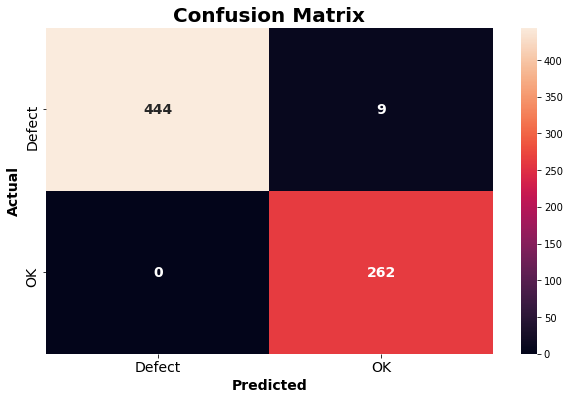

In [17]:
pred_probability = model.predict_generator(test_set)
predictions = pred_probability > 0.5

plt.figure(figsize=(10,6))
plt.title("Confusion Matrix", size=20, weight='bold')
sns.heatmap(
    confusion_matrix(test_set.classes, predictions),
    annot=True,
    annot_kws={'size':14, 'weight':'bold'},
    fmt='d',
    xticklabels=['Defect', 'OK'],
    yticklabels=['Defect', 'OK'])
plt.tick_params(axis='both', labelsize=14)
plt.ylabel('Actual', size=14, weight='bold')
plt.xlabel('Predicted', size=14, weight='bold')
plt.show()

In [18]:
print(classification_report(test_set.classes, predictions, digits=3))

              precision    recall  f1-score   support

           0      1.000     0.980     0.990       453
           1      0.967     1.000     0.983       262

    accuracy                          0.987       715
   macro avg      0.983     0.990     0.987       715
weighted avg      0.988     0.987     0.987       715



<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

## Predict on Some Images
Select images and apply it to the model.

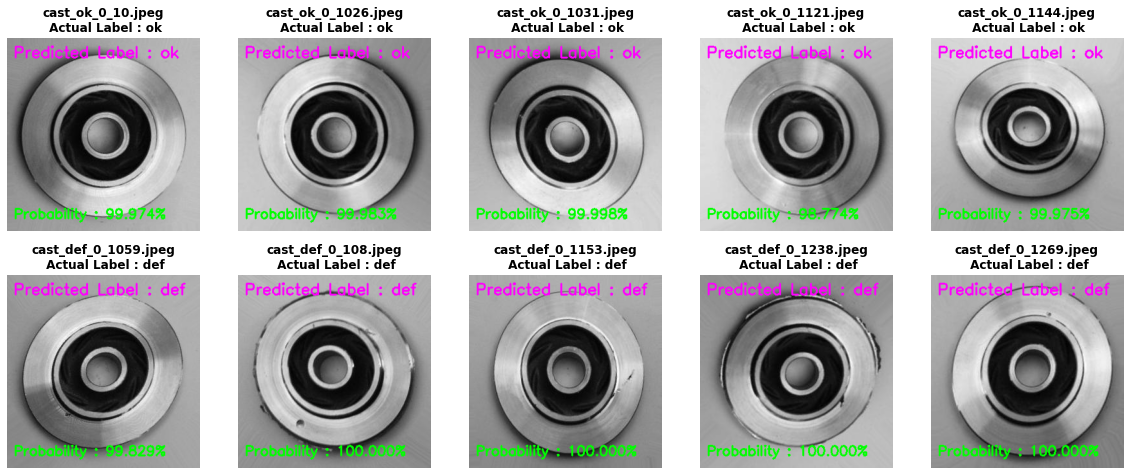

In [19]:
test_cases = ['ok_front/cast_ok_0_10.jpeg', 'ok_front/cast_ok_0_1026.jpeg', 'ok_front/cast_ok_0_1031.jpeg', 'ok_front/cast_ok_0_1121.jpeg', \
              'ok_front/cast_ok_0_1144.jpeg','def_front/cast_def_0_1059.jpeg', 'def_front/cast_def_0_108.jpeg', 'def_front/cast_def_0_1153.jpeg',\
              'def_front/cast_def_0_1238.jpeg', 'def_front/cast_def_0_1269.jpeg']

plt.figure(figsize=(20,8))
for i in range(len(test_cases)):
    img_pred = cv2.imread(test_path + test_cases[i], cv2.IMREAD_GRAYSCALE)
    img_pred = img_pred / 255 # rescale
    prediction = model.predict(img_pred.reshape(1, *image_shape))
    
    img = cv2.imread(test_path + test_cases[i])
    label = test_cases[i].split("_")[0]
    
    plt.subplot(2, 5, i+1)
    plt.title(f"{test_cases[i].split('/')[1]}\n Actual Label : {label}", weight='bold', size=12)
    # Predicted Class : defect
    if (prediction < 0.5):
        predicted_label = "def"
        prob = (1-prediction.sum()) * 100
    # Predicted Class : OK
    else:
        predicted_label = "ok"
        prob = prediction.sum() * 100
        
    cv2.putText(img=img, text=f"Predicted Label : {predicted_label}", org=(10, 30), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.8, color=(255, 0, 255), thickness=2)
    cv2.putText(img=img, text=f"Probability : {'{:.3f}'.format(prob)}%", org=(10, 280), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=(0, 255, 0), thickness=2)
    plt.imshow(img,cmap='gray')
    plt.axis('off')

plt.show()

## Misclassified Images
Let's take a look at the misclassified images in the test set. It is not clear to the human eye why it was misclassified.

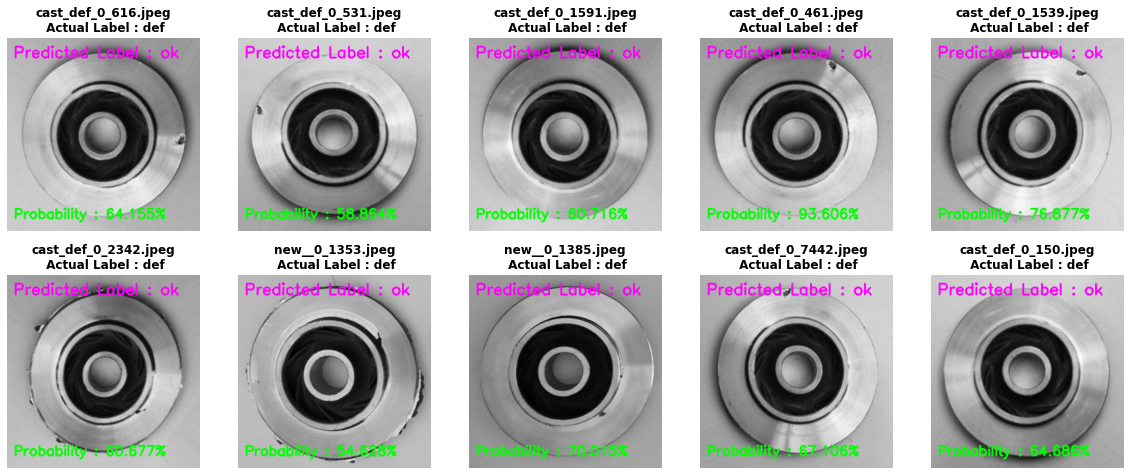

In [20]:
test_cases = ['ok_front/'+i for i in os.listdir(f'{data_dir}/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/test/ok_front')]
test_cases.extend(['def_front/'+i for i in os.listdir(f'{data_dir}/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/test/def_front')])

plt.figure(figsize=(20,8))
cnt = 0 
misclassified = []
for i in range(len(test_cases)):
    if cnt == 10:break # show max 10 images
    img_pred = cv2.imread(test_path + test_cases[i], cv2.IMREAD_GRAYSCALE)
    try:
        img_pred = img_pred / 255 # rescale
    except:
        continue
    prediction = model.predict(img_pred.reshape(1, *image_shape))
    
    img = cv2.imread(test_path + test_cases[i])
    label = test_cases[i].split("_")[0]
    
    # Predicted Class : defect
    if (prediction < 0.5):
        predicted_label = "def"
        prob = (1-prediction.sum()) * 100
    # Predicted Class : OK
    else:
        predicted_label = "ok"
        prob = prediction.sum() * 100
    
    # select mismatched case
    if label != predicted_label:
        misclassified.append(test_cases[i])
        plt.subplot(2, 5, cnt+1)
        plt.title(f"{test_cases[i].split('/')[1]}\n Actual Label : {label}", weight='bold', size=12)
        cv2.putText(img=img, text=f"Predicted Label : {predicted_label}", org=(10, 30), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.8, color=(255, 0, 255), thickness=2)
        cv2.putText(img=img, text=f"Probability : {'{:.3f}'.format(prob)}%", org=(10, 280), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.7, color=(0, 255, 0), thickness=2)
        plt.imshow(img,cmap='gray')
        plt.axis('off')
        cnt += 1
    else:
        continue

plt.show()

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

## Explain Model
<div class="alert alert-success" role="alert" style="border-radius:10px">
Perform model interpretation by using <a href='https://github.com/slundberg/shap'>SHAP</a>. Let's use some of the images that were classified as <b>defect</b> to see what part of images were regarded as important features. <br>
Focusing on the <b>blue part</b> of SHAP results, it is considered that the model regards <u>the scratches/holes on the surface of the products and the unevenness around the products</u> as the features of defective products.
</div>

In [21]:
train_cases = ['ok_front/'+i for i in os.listdir(f'{data_dir}/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train/ok_front')]
train_cases.extend(['def_front/'+i for i in os.listdir(f'{data_dir}/real-life-industrial-dataset-of-casting-product/casting_data/casting_data/train/def_front')])
train_sample = [cv2.imread(train_path + i, cv2.IMREAD_GRAYSCALE).reshape(1, *image_shape) / 255 for i in np.random.choice(train_cases, 3000, replace=False)]
explainer = shap.DeepExplainer(model, train_sample[0])

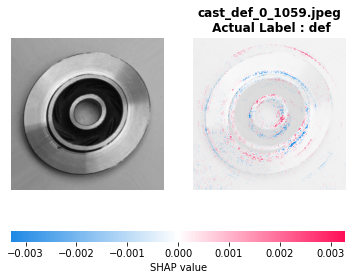

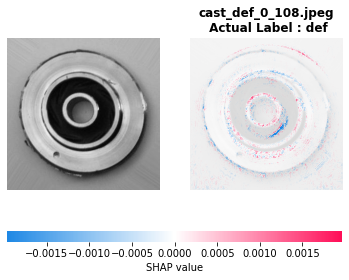

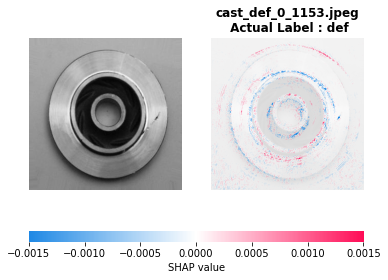

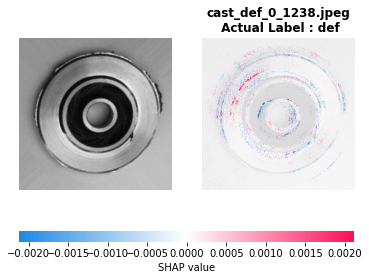

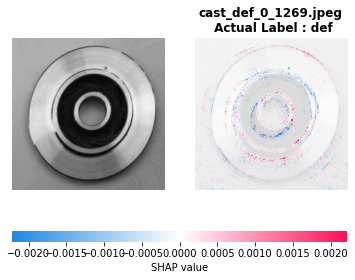

In [22]:
test_cases = ['def_front/cast_def_0_1059.jpeg', 'def_front/cast_def_0_108.jpeg', 'def_front/cast_def_0_1153.jpeg',\
              'def_front/cast_def_0_1238.jpeg', 'def_front/cast_def_0_1269.jpeg']

for i in test_cases:
    img = cv2.imread(test_path + i, cv2.IMREAD_GRAYSCALE).reshape(1, *image_shape) / 255
    shap_values = explainer.shap_values(img)
    shap.image_plot(shap_values, img, show=False) 
    plt.title(f"{i.split('/')[1]}\n Actual Label : {i.split('_')[0]}", weight='bold', size=12)
    plt.axis('off')
plt.show()

## Explain Why Misclassified
Consider why misclassified images were misclassified using SHAP as above. It is considered that <u>the shadows, scratches, and holes in the images are overlooked</u> and judged to be <b>normal</b>.

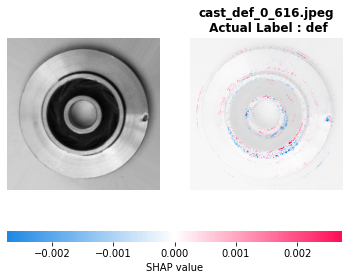

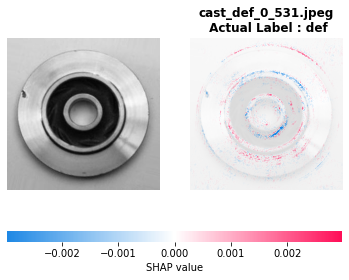

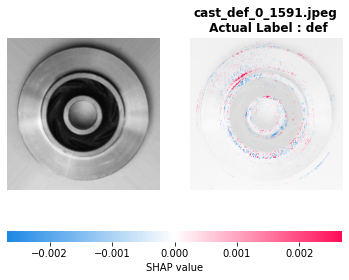

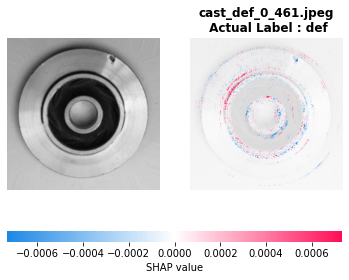

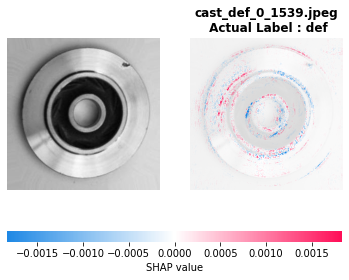

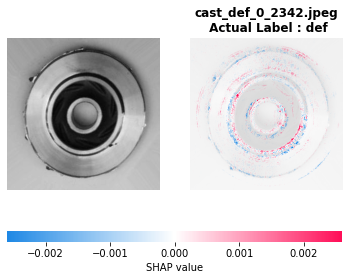

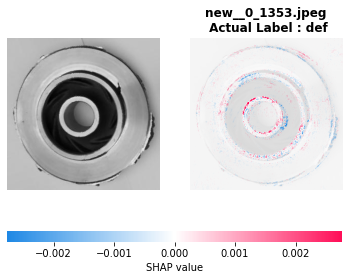

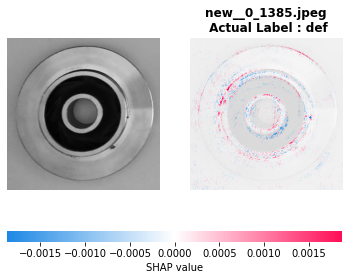

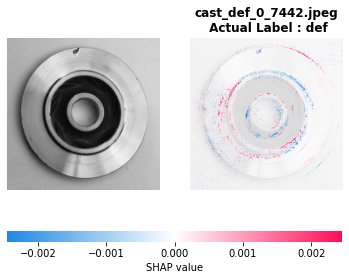

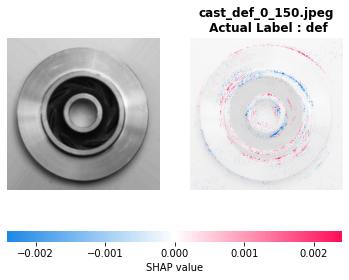

In [23]:
for i in misclassified:
    img = cv2.imread(test_path + i, cv2.IMREAD_GRAYSCALE).reshape(1, *image_shape) / 255
    shap_values = explainer.shap_values(img)
    shap.image_plot(shap_values, img, show=False) 
    plt.title(f"{i.split('/')[1]}\n Actual Label : {i.split('_')[0]}", weight='bold', size=12)
    plt.axis('off')
plt.show()

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">Conclusion</div>
<div class="alert alert-success" role="alert" style="border-radius:10px">
    <ul>
        <li><b>Data augmentation</b> proces can be easily incorporated into training process by using ImageDataGenerator.</li>
        <li>In data augmentation process, we should avoid excessive conversion and may require subtle adjustments depending on the dataset.</li>
        <li>According to the result of model interpretation, it was found that <b>the scratches/holes on the surface of the products and the unevenness around the products</b> are regarded as the important features of defective products.</li>
        <li>Since we successfully built a model with relatively high accuracy, it is considered possible to incorporate the model into the camera of the inspection line and proceed with the automation of inspection.
            <ul>
                <li>However, considering the damage caused by mis-detection, there is no full-reliability until the model is used for full automation (there are also difficulties related to image acquisition such as lighting). So we should introduce it as one of tools to support inspection workers or a labor saving method.</li>
                <li>Also, there is a idea to improve the model and the defective product detection system in <b><a href="https://ieeexplore.ieee.org/document/9493179">Human-in-the-Loop</a></b> way.</li>
            </ul>
        </li>
    </ul>
</div>

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>

# <div style="text-align: left; background-color: mediumseagreen; color: white; padding: 10px; line-height:1;border-radius:10px">References</div>
* Keras Official Manual  
    * https://keras.io/ja/  
* Image Data Pre-Processing Techniques
    * https://pynote.hatenablog.com/entry/keras-image-data-generator 
* Keras ImageDataGenerator  
    * https://keras.io/ja/preprocessing/image/
* OpenCV puttext
    * http://opencv.jp/opencv-2svn/cpp/drawing_functions.html#cv-puttext  
* CNN Basic Explanation  
    * https://products.sint.co.jp/aisia/blog/vol1-16  
* CNN Implementations using Keras
    * https://qiita.com/kenichiro-yamato/items/60affeb7ca9f67c87a17  
    * https://child-programmer.com/ai/keras/conv2d/  
    * https://child-programmer.com/ai/keras/maxpooling2d/  
* SHAP Deep Explainer 
    * https://shap-lrjball.readthedocs.io/en/latest/generated/shap.DeepExplainer.html  
* SHAP Image Plot  
    * https://shap-lrjball.readthedocs.io/en/latest/generated/shap.image_plot.html  
* Referenced Notebooks  
    * CNN Implementation  
        * https://www.kaggle.com/ravirajsinh45/simple-model-for-casting-product-classification  
        * https://www.kaggle.com/ginsaputra/visual-inspection-of-casting-products-using-cnn  
        * https://www.kaggle.com/tomythoven/casting-inspection-with-data-augmentation-cnn  
    * Feature Map  
        * https://www.kaggle.com/vannak/magical-localized-fault-detection
* MISC
    * https://codepen.io/ikapper/pen/EqaVjP

<button class="label alert-success" style="border-radius:10px;padding:10px;font-size:18px"><a href="#top" style="color:green;"><b>Table of Contents</b></a></button>